In [79]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
housing = fetch_california_housing()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42)



In [80]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train.reshape(-1, 1)).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test.reshape(-1, 1)).float()



In [81]:
# Define the model
class HousingModel(nn.Module):
    def __init__(self):
        super(HousingModel, self).__init__()
        self.linear = nn.Linear(8, 1)

    def forward(self, x):
        out = self.linear(x)
        return out

obj = HousingModel()

In [82]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(obj.parameters(), lr=0.01)

# Train the model
num_epochs = 1000
loss_avg = 0;
losses = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = obj(X_train)
    loss = criterion(outputs, y_train)
    loss_avg += loss.item()
    losses.append(loss.item())
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'epoch {(epoch+1)//100:2}, Loss: {(loss_avg/1000):.4f}')
        loss_avg = 0

epoch  1, Loss: 0.1693
epoch  2, Loss: 0.0697
epoch  3, Loss: 0.0635
epoch  4, Loss: 0.0604
epoch  5, Loss: 0.0582
epoch  6, Loss: 0.0566
epoch  7, Loss: 0.0554
epoch  8, Loss: 0.0546
epoch  9, Loss: 0.0539
epoch 10, Loss: 0.0535


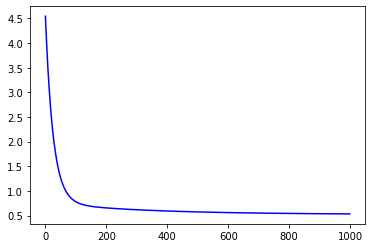

In [83]:
plt.plot(range(1000), losses, 'b')

In [84]:
# Test the model
with torch.no_grad():
    outputs = obj(X_test)
    loss = criterion(outputs, y_test)
    print(f'Test Loss: {loss.item():.4f}')

Test Loss: 0.5452
